# Data Mining Practical-1

**Name - Harsh Bamotra** <br>
Roll No. - AC-1216 <br>
College - Acharya Narendra Dev College <br>
Course - B.Sc. (H) Computer Science <br><br>

**Reading the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruleset

### Create a file “people.txt” with the data and perform the following:

**i) Read data from file people.txt.**

In [2]:
df = pd.read_csv("people.txt", delimiter=" ")
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


**ii) Create a ruleset E that contain differrnt rules.**

Content of the ruleset.py file imported earlier with other required libraries.

<pre> def age_check(df):
    errors = df["Age"][(df["Age"]>150)|(df["Age"]<0)].shape[0]
    return errors, "Checking if age is in range 0-150"
    
def age_check2(df): 
    n = df.shape[0]
    errors = 0
    for i in range(n):
        if df["Age"][i]<df["yearsmarried"][i]:
            errors+=1
    return errors, "Checking if age is greater than years married"<pre/>

<pre>def status_check(df):
    errors = df.shape[0]-df[df["status"].isin(['single','married','widowed'])].shape[0]
    return errors, "Checking if status contains values only from single, married,widowed"

def agegroup_check(df):
    n = df.shape[0]
    errors = 0
    for i in range(n):
        if df["Age"][i]<18 and df["agegroup"][i]!="child":
            errors+=1
        elif df["Age"][i]>=18 and df["Age"][i]<65 and df["agegroup"][i]!="adult":
            errors+=1
        elif df["Age"][i]>=65 and df["agegroup"][i]!="elderly":
            errors+=1
    return errors, "Checking if age group lies correctly according to age"<pre/>

**iii) Check whether ruleset E is violated by the data in the file people.txt.**

In [3]:
rules = []
rules.append(ruleset.age_check)
rules.append(ruleset.age_check2)
rules.append(ruleset.status_check)
rules.append(ruleset.agegroup_check)

**iv) Summarize the results obtained.**

In [4]:
violations = []
rule = list(map(lambda x: "Rule "+str(x), range(1,len(rules)+1)))
for i in range(len(rules)):
    violation,desc = rules[i](df)
    print(f"{rule[i]}: {desc}\nviolations:{violation}")
    violations.append(violation)

Rule 1: Checking if age is in range 0-150
violations:1
Rule 2: Checking if age is greater than years married
violations:1
Rule 3: Checking if status contains values only from single, married,widowed
violations:0
Rule 4: Checking if age group lies correctly according to age
violations:1


**v) Visualize the results obtained.**

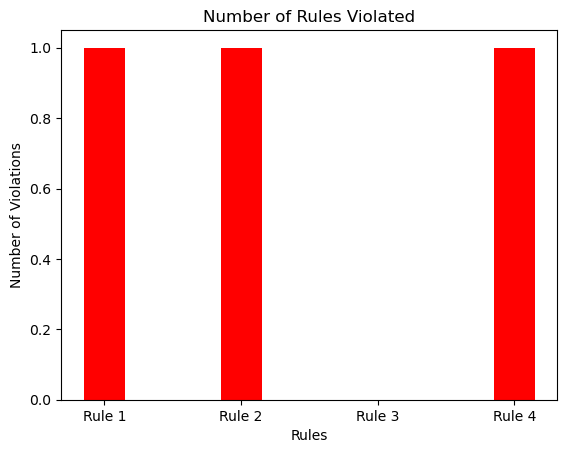

In [5]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot()
ax.bar(rule,violations,0.3, color = "red")
plt.ylabel("Number of Violations")
plt.xlabel("Rules")
plt.title("Number of Rules Violated")
plt.show()